In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/DATA CHẤT LƯỢNG KHÔNG KHÍ/data của viện nhi/data_output (1).xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/DATA CHẤT LƯỢNG KHÔNG KHÍ/data của viện nhi/pneumonia_01july2024 (2).xlsx')

df = pd.concat([df1, df2], axis=1)
df.head()

,date,holiday,thang,nam,dow,weekend,hn_dmo3a,hn_dmo3m,hn_dmno,hn_dmno2,...,hn_dmco,hn_dmpm10,hn_dmpm25,hn_dmpm1,hn_dmwisp,hn_dmso2,hn_dmtemp,hn_dmhum,date,count
0,2010-01-01,1,1,2010,5,0,12.773337,19.155500,73.313637,37.073391,...,2869.264160,82.683708,63.687817,53.553741,0.935593,22.951050,16.750,96.25,2010-01-01,13
1,2010-01-02,0,1,2010,6,1,11.941775,21.280800,79.978386,37.754845,...,3091.271973,53.249500,37.463985,30.909113,1.031725,21.106625,16.725,93.50,2010-01-02,24
2,2010-01-03,0,1,2010,0,1,54.091862,66.220001,51.733109,52.447487,...,2647.305420,98.332199,56.999287,44.949402,1.011433,28.034859,18.625,83.50,2010-01-03,19
3,2010-01-04,0,1,2010,1,0,39.317726,60.505001,52.855743,60.220432,...,2787.883301,76.243179,50.712963,41.189350,1.534541,20.061163,19.825,87.25,2010-01-04,15
4,2010-01-05,0,1,2010,2,0,52.317215,74.869003,46.449150,50.686054,...,2615.624268,48.950001,33.689999,28.730000,1.638597,10.465546,22.025,86.00,2010-01-05,17


In [ ]:
count = df2['count']
print('=========Thống kê mô tả cơ bản=========')
print(count.describe())

=========Thống kê mô tả cơ bản=========
count    3652.000000
mean       33.155257
std        15.579370
min         4.000000
25%        21.000000
50%        30.000000
75%        43.000000
max        94.000000
Name: count, dtype: float64


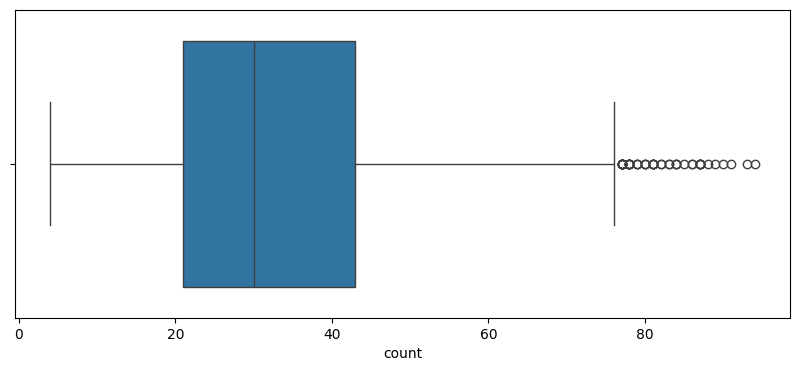

In [ ]:
plt.figure(figsize = (10,4))
sns.boxplot(x = count)
plt.show()

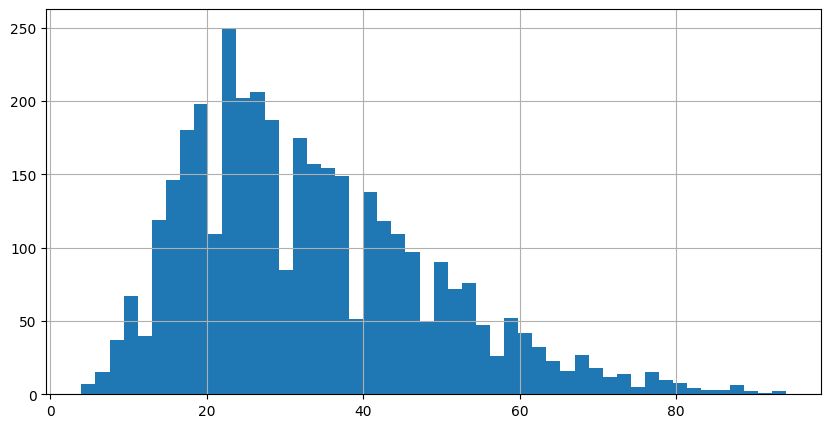

In [ ]:
count.hist(bins = 50 ,figsize = (10,5))
plt.show()

In [ ]:
# Tính tổng theo tháng
monthly_total = df.groupby('thang')['count'].mean()

# Hiển thị kết quả
print(monthly_total)

thang
1     33.696774
2     31.712766
3     37.854839
4     36.910000
5     27.903226
6     26.590000
7     27.606452
8     34.548387
9     39.646667
10    36.877419
11    32.400000
12    32.080645
Name: count, dtype: float64


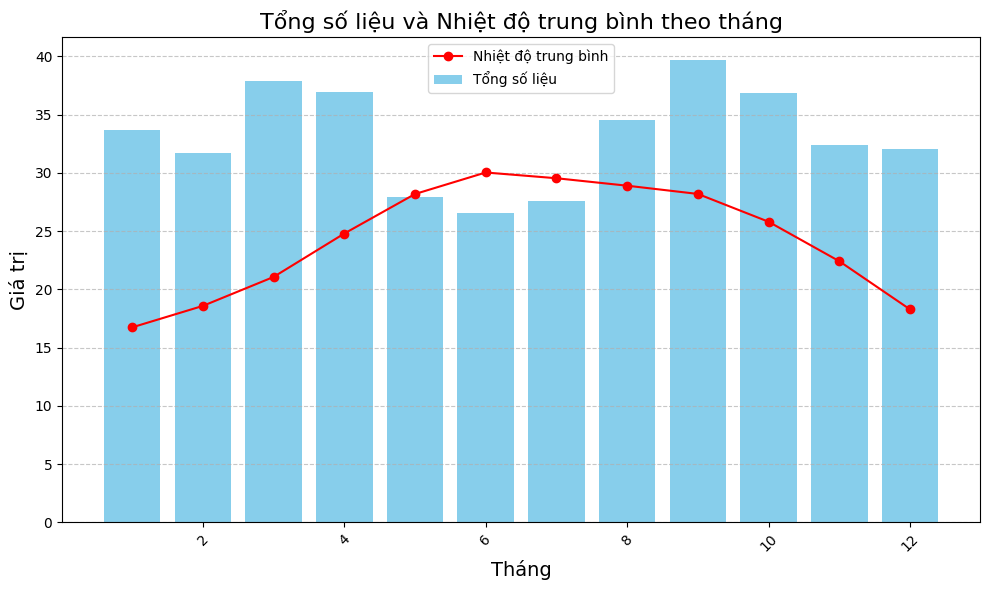

In [ ]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
total_cases = df['count']
monthly_avg_temp = df.groupby('thang')['hn_dmtemp'].mean()

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột (Tổng số liệu)
plt.bar(months, monthly_total, color='skyblue', label='Tổng số liệu')

# Vẽ biểu đồ đường (Nhiệt độ trung bình)
plt.plot(months, monthly_avg_temp, color='red', marker='o', label='Nhiệt độ trung bình')

# Thêm tiêu đề và nhãn
plt.title('Tổng số liệu và Nhiệt độ trung bình theo tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Giá trị', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

thang
1     16.735338
2     18.576674
3     21.060110
4     24.786220
5     28.179676
6     30.028497
7     29.535421
8     28.895833
9     28.188664
10    25.801685
11    22.415012
12    18.280491
Name: hn_dmtemp, dtype: float64


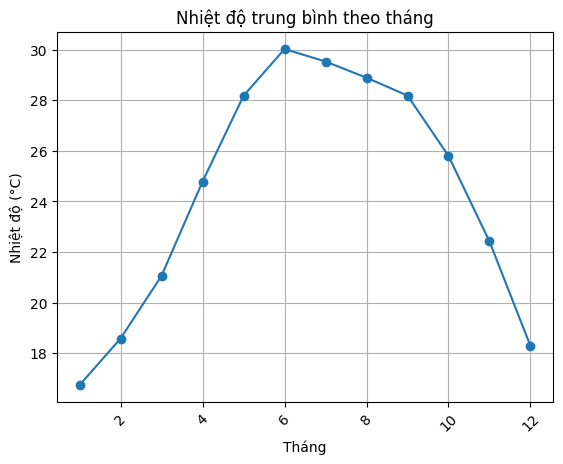

In [ ]:
monthly_avg_temp = df.groupby('thang')['hn_dmtemp'].mean()

# Hiển thị kết quả
print(monthly_avg_temp)

monthly_avg_temp.plot(kind='line', marker='o', title='Nhiệt độ trung bình theo tháng', ylabel='Nhiệt độ (°C)', xlabel='Tháng')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

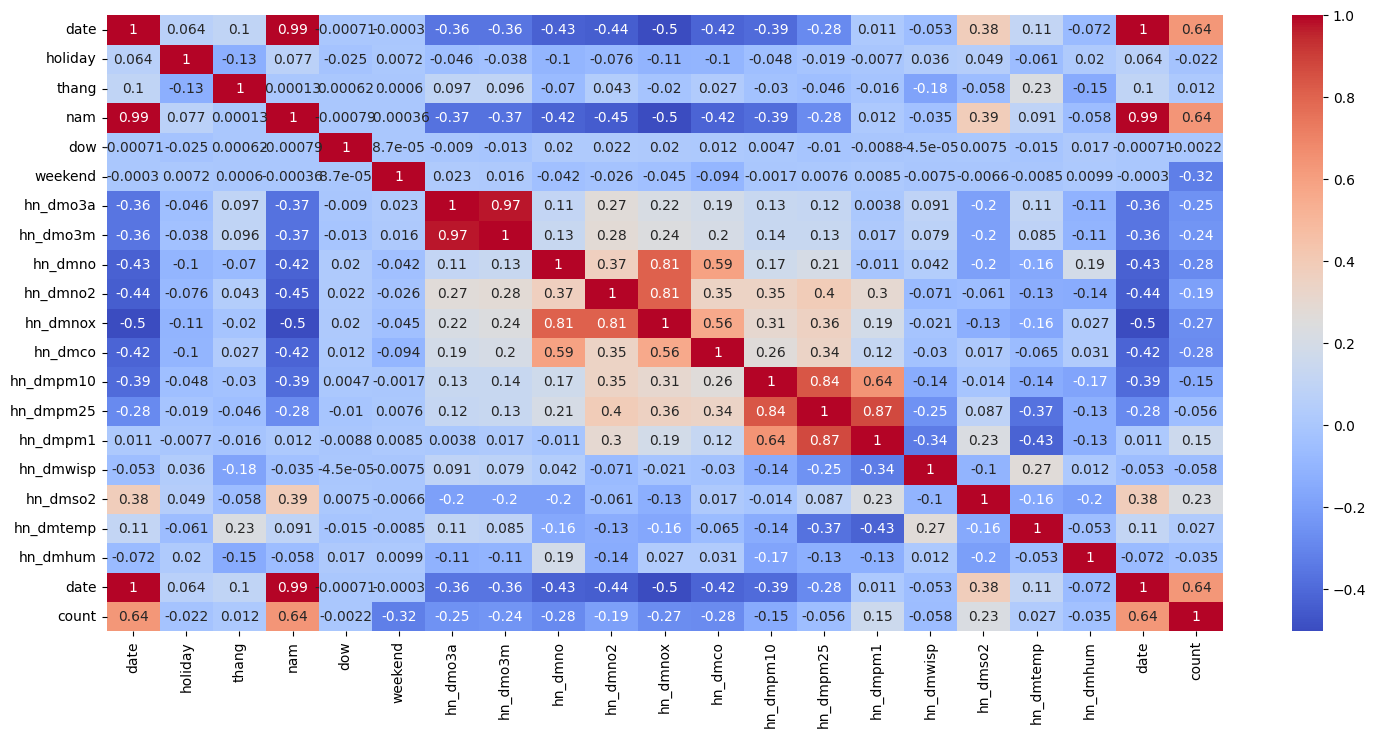

In [ ]:
corr = df.corr()

# Hiển thị ma trận tương quan
plt.figure(figsize=(18, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

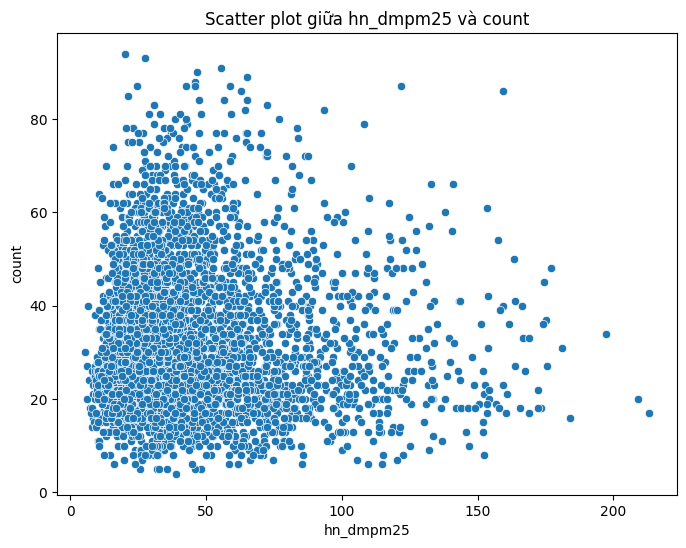

In [ ]:
# Scatter plot để xem mối quan hệ giữa hai biến
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['hn_dmpm25'], y=df2['count'])
plt.title('Scatter plot giữa hn_dmpm25 và count')
plt.show()

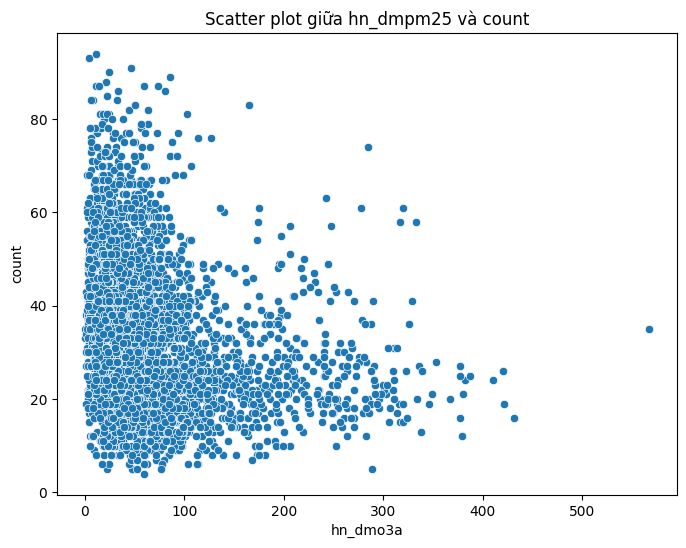

In [ ]:
# Scatter plot để xem mối quan hệ giữa hai biến
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['hn_dmo3a'], y=df2['count'])
plt.title('Scatter plot giữa hn_dmpm25 và count')
plt.show()

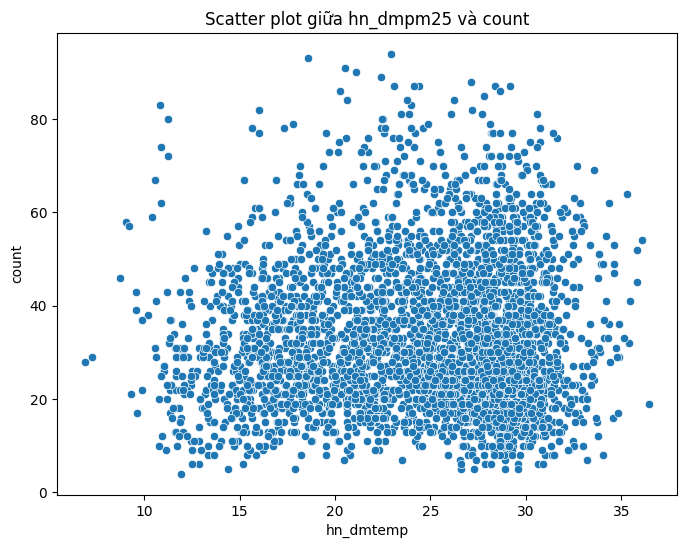

In [ ]:
# Scatter plot để xem mối quan hệ giữa hai biến
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['hn_dmtemp'], y=df2['count'])
plt.title('Scatter plot giữa hn_dmpm25 và count')
plt.show()

In [ ]:
# tạo ra các biến mới

o3a = df['hn_dmo3a']
o3m = df['hn_dmo3m']
so2 = df['hn_dmso2']
co = df['hn_dmco']
nox = df['hn_dmnox']
pm10 = df['hn_dmpm10']
pm25 = df['hn_dmpm25']
no2 = df['hn_dmno2']

# Tỷ lệ O3 buổi sáng và buổi chiều:
ratio_O3 = o3a / o3m
df['ratio_O3'] = ratio_O3

# Hiệu giữa NOx và NO2 (tương quan giữa NO và NO2)
diff_nox_no2 = nox - no2
df['diff_nox_no2'] = diff_nox_no2

# Tổng hợp mức độ ô nhiễm không khí từ các trường
total_pollution = so2 + co + nox + pm10 + pm25 + no2
df['total_pollution'] = total_pollution

# Nhiệt độ cao + độ ẩm cao có thể làm tăng nguy cơ nhiễm bệnh
Temp_Hum_Interaction = df['hn_dmtemp'] * df['hn_dmhum']
df['Temp_Hum_Interaction'] = Temp_Hum_Interaction

# Phản ánh trạng thái "nóng ẩm":
Temp_Hum_Diff = df['hn_dmhum'] - df['hn_dmtemp']
df['Temp_Hum_Diff'] = Temp_Hum_Diff

# Gió mạnh có thể giúp giảm ô nhiễm nhưng cũng làm lan tỏa các chất độc hại
Wind_Pollution = df['hn_dmwisp'] * total_pollution
df['wind_pollution'] = Wind_Pollution




In [ ]:
df

,date,holiday,thang,nam,dow,weekend,hn_dmo3a,hn_dmo3m,hn_dmno,hn_dmno2,...,hn_dmtemp,hn_dmhum,date,count,ratio_O3,diff_nox_no2,total_pollution,Temp_Hum_Interaction,Temp_Hum_Diff,wind_pollution
0,2010-01-01,1,1,2010,5,0,12.773337,19.155500,73.313637,37.073391,...,16.750000,96.250000,2010-01-01,13,0.666823,73.338192,3186.071709,1612.187500,79.500000,2980.866797
1,2010-01-02,0,1,2010,6,1,11.941775,21.280800,79.978386,37.754845,...,16.725000,93.500000,2010-01-02,24,0.561153,79.955528,3358.557301,1563.787500,76.775000,3465.106494
2,2010-01-03,0,1,2010,0,1,54.091862,66.220001,51.733109,52.447487,...,18.625000,83.500000,2010-01-03,19,0.816851,51.774521,2987.341259,1555.187500,64.875000,3021.496972
3,2010-01-04,0,1,2010,1,0,39.317726,60.505001,52.855743,60.220432,...,19.825000,87.250000,2010-01-04,15,0.649826,52.813404,3108.154875,1729.731250,67.425000,4769.591865
4,2010-01-05,0,1,2010,2,0,52.317215,74.869003,46.449150,50.686054,...,22.025000,86.000000,2010-01-05,17,0.698783,46.482792,2856.584713,1894.150000,63.975000,4680.790833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,0,12,2019,5,0,10.873887,12.005400,22.465544,25.652315,...,17.017096,75.974998,2019-12-27,25,0.905750,29.098242,1533.713303,1292.873810,58.957903,1725.427466
3648,2019-12-28,0,12,2019,6,1,11.290137,14.756650,25.581005,36.073921,...,18.213373,78.400002,2019-12-28,8,0.765088,33.910248,1842.909227,1427.928485,60.186628,2534.000188
3649,2019-12-29,0,12,2019,0,1,18.260731,22.637100,26.765335,39.268600,...,20.182888,80.449997,2019-12-29,11,0.806673,33.028229,2020.213511,1623.713281,60.267109,2525.266889
3650,2019-12-30,0,12,2019,1,0,11.095100,17.637899,38.926502,40.466728,...,21.296024,83.699997,2019-12-30,24,0.629049,47.210182,2695.087176,1782.477171,62.403973,2358.201279


In [ ]:
price_columns = ['count','holiday','weekend','hn_dmo3a',	'hn_dmo3m',	'hn_dmno2',	'hn_dmnox',	'hn_dmco',	'hn_dmpm10',	'hn_dmpm25',	'hn_dmpm1',	'hn_dmwisp'	,'hn_dmso2'	,'hn_dmtemp',	'hn_dmhum','ratio_O3','diff_nox_no2','total_pollution','Temp_Hum_Interaction','Temp_Hum_Diff','wind_pollution']
dta = df[price_columns]

X = dta.drop('count', axis=1)
y = dta['count']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

X1 = pd.DataFrame(X1, columns=X.columns)

[0.04447423 0.21781583 0.02401487 0.04462469 0.01943443 0.02018745
 0.12592964 0.03195094 0.02707414 0.07554797 0.01679832 0.07144623
 0.04290802 0.01723898 0.02236131 0.05939412 0.0394674  0.05188777
 0.02459288 0.0228508 ]


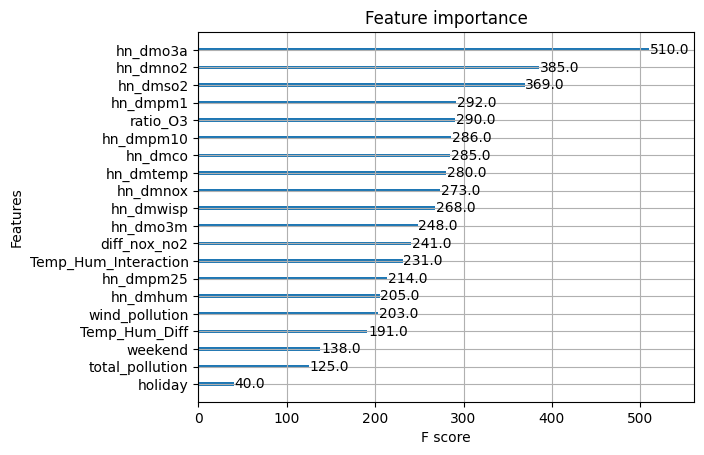

In [ ]:
xgb_reg = xgb.XGBRegressor()


xgb_reg.fit(X1, y)

# Xem độ quan trọng của các đặc trưng
importances = xgb_reg.feature_importances_

# In ra các đặc trưng quan trọng
print(importances)

# Bạn có thể vẽ biểu đồ nếu muốn
from xgboost import plot_importance
plot_importance(xgb_reg)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Chuẩn hóa dữ liệu trước khi áp dụng PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA
pca = PCA(n_components=5)  # Giữ lại 5 thành phần chính
X_pca = pca.fit_transform(X_scaled)

# Kiểm tra phương sai được giải thích bởi mỗi thành phần
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.23710053 0.16347007 0.1161358  0.08460931 0.06596956]


In [ ]:
colums1 = ['count','hn_dmo3a',	'hn_dmno2',
          'hn_dmso2','ratio_O3','hn_dmpm10',	'hn_dmpm1','hn_dmco']
        	# ,'hn_dmso2'	,'hn_dmtemp']#,'ratio_O3',
                          #  'diff_nox_no2','Temp_Hum_Interaction','Temp_Hum_Diff','wind_pollution']
# colums1 = ['count','hn_dmo3a','hn_dmso2','hn_dmco','hn_dmno2','hn_dmtemp']
data_xgb = df[colums1]

total_row = len(data_xgb)

train = int(total_row * 0.9)
test = total_row  - train

train_data = data_xgb.iloc[:train]
drop_train = train_data.loc[train_data['count'] >= 78]
train_data = train_data.drop(drop_train.index)

test_data = data_xgb.iloc[train:]
drop_test = test_data.loc[test_data['count'] >= 78]
test_data = test_data.drop(drop_test.index)

X_train = train_data.drop('count', axis=1)
y_train = train_data['count']

X_test = test_data.drop('count', axis=1)
y_test = test_data['count']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)


print(train_data.shape)
print(test_data.shape)

(3284, 8)
(329, 8)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dữ liệu mẫu
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa hàm mục tiêu
def objective(trial):
    # Tham số cần tối ưu
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 5000, 12000),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
    }
    # Khởi tạo mô hình
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')
    # Tính điểm cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Khởi tạo quá trình tối ưu
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả
print("Best parameters:", study.best_params)
print("Best score:", study.best_value)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


# Hàm mất mát tùy chỉnh cho Quantile Loss
def quantile_loss(y_true, y_pred, tau=0.5):
    """
    Hàm tính gradient và Hessian cho Quantile Loss.
    Args:
        y_true: Giá trị thực (numpy array).
        y_pred: Giá trị dự đoán (numpy array).
        tau: Phân vị mong muốn (ví dụ: 0.5 cho trung vị).
    Returns:
        grad: Gradient (numpy array).
        hess: Hessian (numpy array, tất cả giá trị = 1 vì linear loss).
    """
    error = y_true - y_pred
    grad = np.where(error > 0, -tau, 1 - tau)  # Gradient
    hess = np.ones_like(y_true)  # Hessian = 1 cho loss tuyến tính
    return grad, hess

# Wrapper hàm mất mát để sử dụng trong XGBoost
class QuantileObjective:
    def __init__(self, tau=0.5):
        self.tau = tau

    def __call__(self, y_true, y_pred):
        grad, hess = quantile_loss(y_true, y_pred, self.tau)
        return grad, hess

# Khởi tạo mô hình với hàm mất mát tùy chỉnh
tau = 2.355555  # Dự đoán trung vị (50th percentile)
quantile_obj = QuantileObjective(tau)

Xgb = xgb.XGBRegressor(
    learning_rate=0.002625,
    n_estimators=8527,
    max_depth=3,
    subsample=0.6382,
    colsample_bytree=0.7316,
    objective=quantile_obj
)

# Huấn luyện mô hình
Xgb.fit(X_train, y_train)

# Dự đoán và tính các chỉ số
y_pred = Xgb.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 14.684479334301715
MAPE: 0.259010996226757
